In [ ]:
import pandas as pd
import yfinance as yf
import datetime as dt
spot = yf.download('^ndx', start=dt.date(2021,1,1), interval='1h')[['Open','Close']]
future = yf.download('NQ=F', start=dt.date(2021,1,1), interval='1h')[['Open','Close']]
range = pd.date_range(start=dt.date(2021,1,1), end= dt.datetime.today(), freq="1h")

spot['rvol'] = [abs((_open-close)/_open) for _open, close in zip(spot['Open'], spot['Close'])]


In [ ]:
spot = pd.DataFrame(spot['rvol'])
future['rvol'] = [abs((_open-close)/_open) for _open, close in zip(future['Open'], future['Close'])]
future = pd.DataFrame(future['rvol'])
rvols = pd.DataFrame(dict(zip(range, [{'rvol': None} for _ in range]))).transpose()

In [267]:
_index = spot.index.tz_localize(None)
_spot = pd.DataFrame()
_spot.index = _index
_spot['rvol'] = spot['rvol']
future.index = future.index.tz_localize(None)
rvols = pd.concat([_spot, future])
rvols = rvols.squeeze()
rvols = rvols.interpolate()

In [313]:
import numpy as np
rv = rvols.groupby([rvols.index.hour]).sum()
rv = rv.squeeze()
rv = rv.replace(to_replace=float(0), value=np.nan)
rv = rv.interpolate()
total = rv.sum()

rv_per = pd.DataFrame()
rv_per.index = rv.index
rv_per['pct'] = rv/total
rv_per['rem'] = (1-rv_per['pct'].cumsum())
res = rv_per['rem']
res[-1] = 1
decay = res.sort_index()
rv_per = rv_per['pct'].squeeze()
rv_per

0     0.019346
1     0.022873
2     0.030967
3     0.042439
4     0.037381
5     0.028865
6     0.028292
7     0.035727
8     0.054284
9     0.087878
10    0.087872
11    0.068912
12    0.054740
13    0.056004
14    0.054656
15    0.070493
16    0.031772
17    0.030316
18    0.028859
19    0.024960
20    0.032893
21    0.028510
22    0.023076
23    0.018885
Name: pct, dtype: float64

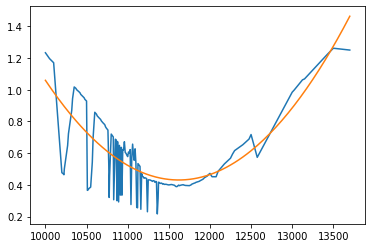

In [307]:
import numpy as np

"""mark skew, time, atm vol"""
from MDAPI.underlier import pair

pair = pair('USD', 'NDX')
time = pair.surface.surface[.5:1].transpose()
time = time.squeeze()
time = time[time.notnull()]
time.plot()

values = [value for value in time.values]
import matplotlib.pyplot as plt
skew = np.polyfit(time.index, values, 2)

res = np.polyval(skew, time.index)
res = pd.Series(dict(zip(time.index, res)))
plt.plot(res)

In [ ]:
skew[2] = 0
res = np.polyval(skew, time.index)
res = pd.Series(dict(zip(time.index, res)))
plt.plot(res)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


0.2   -141.738086
0.8    146.599805
Name: rvol, dtype: float64

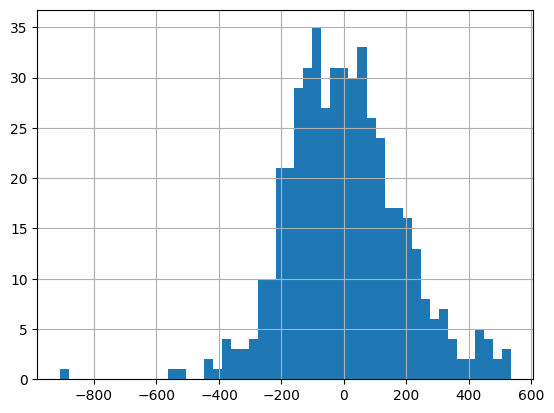

In [20]:
spot = yf.download('^ndx', start=dt.date(2021,1,1), interval='1d')[['Open','Close']]
future = yf.download('NQ=F', start=dt.date(2021,1,1), interval='1d')[['Open','Close']]
range = pd.date_range(start=dt.date(2021,1,1), end= dt.datetime.today(), freq="1d")
spot['rvol'] = spot['Open']-spot['Close']
spot['rvol'].hist(bins=50)
spot['rvol'].quantile([.2,.8])